In [2]:
import pandas as pd

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df = pd.read_csv('data/Social_Network_Ads.csv')

df['Gender'] = le.fit_transform(df['Gender'])

X = df.drop('Purchased', axis=1)

y = df['Purchased']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [8]:
import numpy as np


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def costFunction(X, y, theta):
    A = sigmoid(X @ theta)

    first = y * np.log(A)
    second = (1 - y) * np.log(1 - A)

    return -np.sum(first + second) / len(X)


def gradientDescent(X, y, theta, iters, alpha):
    m = len(X)
    costs = np.zeros(iters)

    for i in range(iters):
        A = sigmoid(X @ theta)
        theta = theta - (alpha / m) * X.T @ (A - y)
        cost = costFunction(X, y, theta)
        costs[i] = cost
    return costs, theta

In [9]:
thetas = np.zeros(X_train.shape[1])

iters = 10

alpha = 0.01

costs, theta = gradientDescent(X_train, y_train, thetas, iters, alpha)



D:\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda3\Lib\site-packages\pan

In [16]:
preds = sigmoid(X_test @ theta).astype(int)
preds

D:\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


209    0
280    0
33     0
210    0
93     0
      ..
332    0
167    0
245    0
311    0
145    0
Length: 132, dtype: int32

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, dual=False, C=10).fit(X_train, y_train)

y_pre = lr.predict(X_test)



In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [10, 100, 1000], 'penalty': ['l1', 'l2']}

lr_cv = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

lr_cv.fit(X_train, y_train)

best_model = lr_cv.best_estimator_

D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise 

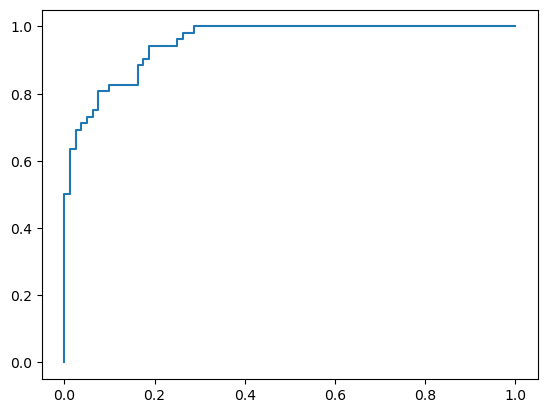

In [23]:

from sklearn.metrics import roc_curve
from sklearn import metrics

pro = lr_cv.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, pro[:, 1])

auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)

In [24]:
print(best_model.coef_)

[[-6.93897276e-07 -5.29131059e-04  1.93814032e-01  3.45695121e-05]]
